In [1]:
import os
from sys import platform
import pandas as pd
from utils.global_config import get_global_config
from utils.plotting import plot_metrics, plot_gain, plot_tradeoff, print_best_params

In [2]:
_config = get_global_config()
BASE_PATH = '\\'.join(os.getcwd().split('\\')[:-1]) + '\\' if platform == 'win32' else '/'.join(os.getcwd().split('/')[:-1]) + '/'
REPORT_FILE_DEFAULT = os.path.join(BASE_PATH, _config.get('RESULT_FILE_DEFAULT'))
REPORT_FILE_TUNING = os.path.join(BASE_PATH, _config.get('RESULT_FILE_TUNING'))
if platform == 'win32':
	REPORT_FILE_DEFAULT = REPORT_FILE_DEFAULT.replace('/', '\\')
	REPORT_FILE_TUNING = REPORT_FILE_TUNING.replace('/', '\\')

In [3]:
results_default = pd.read_csv(REPORT_FILE_DEFAULT, encoding='UTF-8')
results_tuning = pd.read_csv(REPORT_FILE_TUNING, encoding='UTF-8')

In [4]:
print(''.join(['> ' for i in range(30)]))
print(f'\n{"ID":<8}{"VIEW":<45}\n')
print(''.join(['> ' for i in range(30)]))
for i in [[w, pd.unique(results_default['view'])[k]] for k, w in enumerate(pd.unique(results_default['view_id']))]:
	print(f'{i[0]:<8}{i[1]:<45}')

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

ID      VIEW                                         

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
A       candles-BINANCE                              
B       candles-HOUBI                                
C       candles-OKX                                  
D       snapshot-BINANCE                             
E       snapshot-HOUBI                               
F       snapshot-OKX                                 
G       candles-BINANCE--candles-HOUBI               
H       candles-BINANCE--candles-OKX                 
I       candles-HOUBI--candles-OKX                   
J       snapshot-BINANCE--snapshot-HOUBI             
K       snapshot-BINANCE--snapshot-OKX               
L       snapshot-HOUBI--snapshot-OKX                 
M       snapshot-BINANCE--candles-BINANCE            
N       snapshot-HOUBI--candles-HOUBI                
O       snapshot-OKX--candles-OKX                    
P       cand

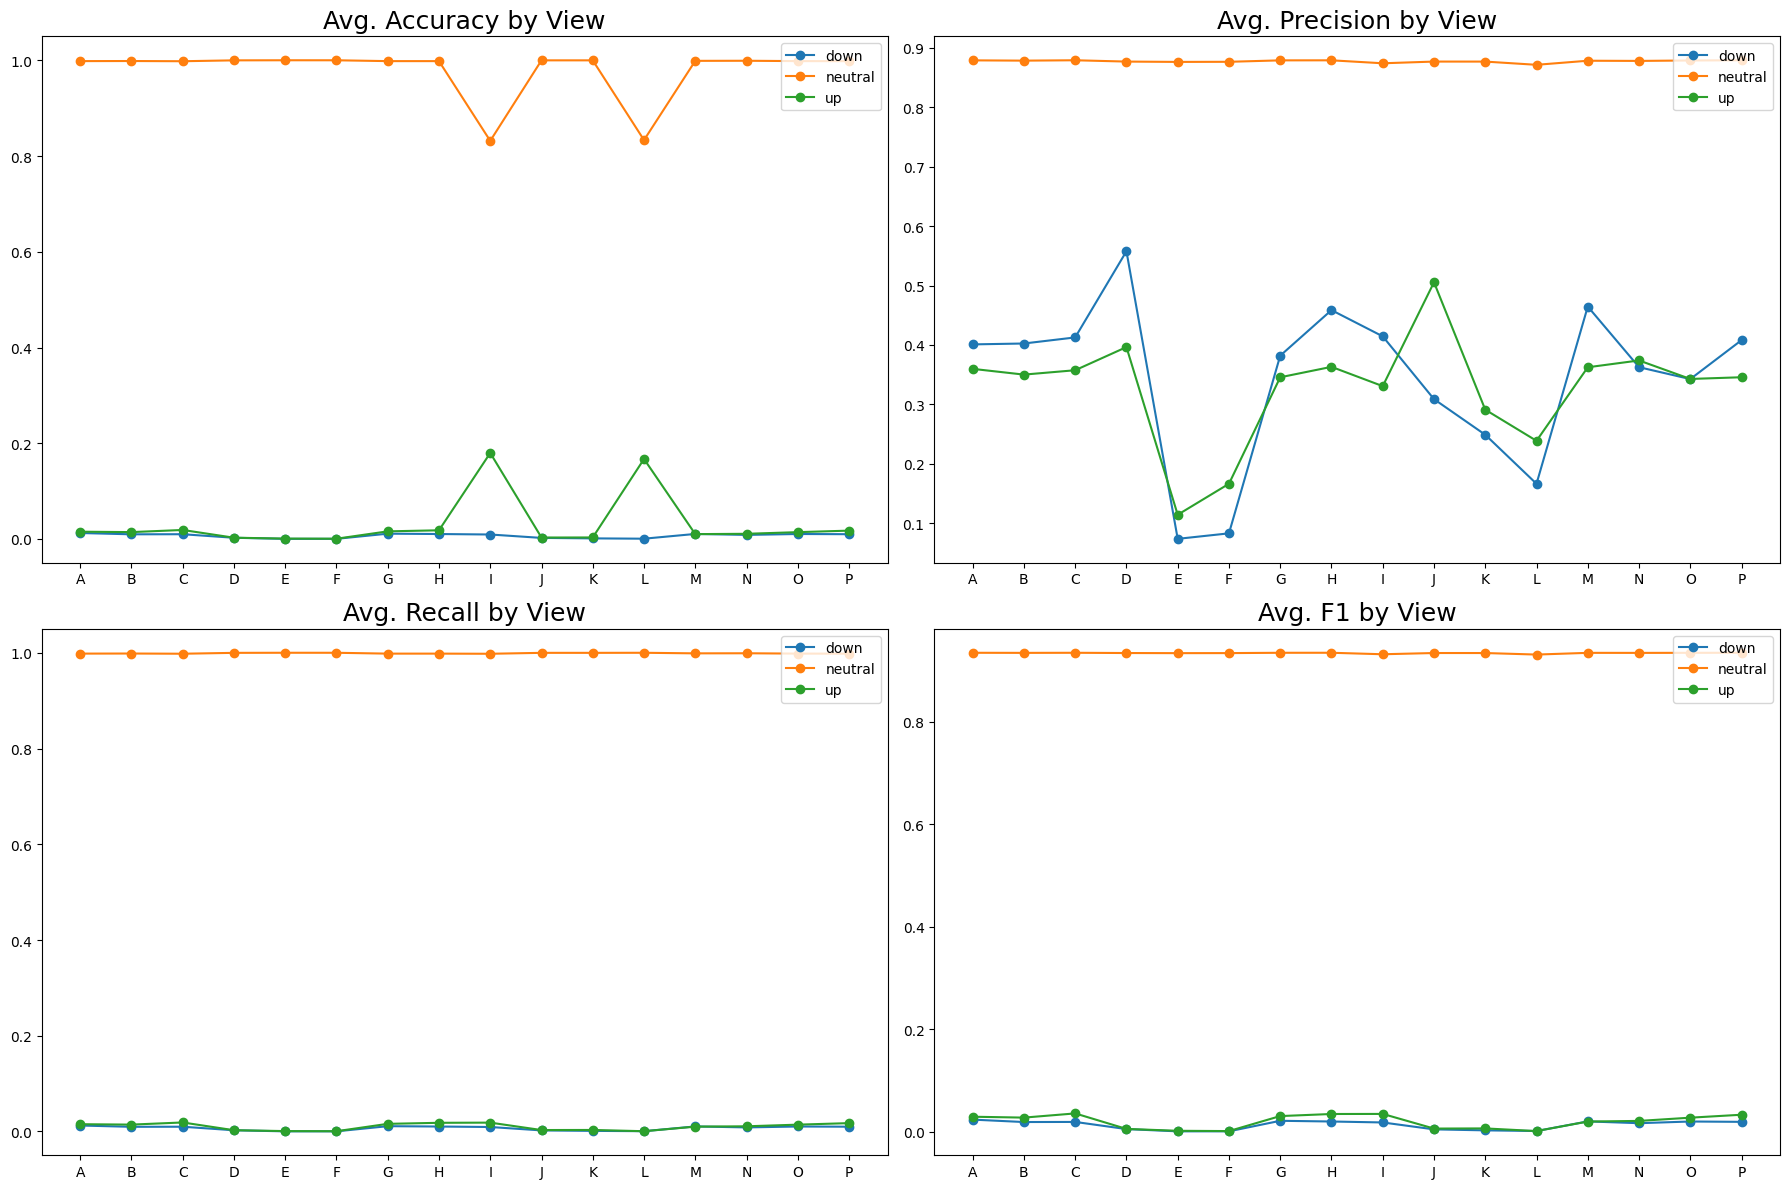

In [5]:
grouped = results_default.drop(columns=['view', 'crypto'])
grouped = grouped.groupby(['view_id']).mean()
plot_metrics(grouped, x_title='View')

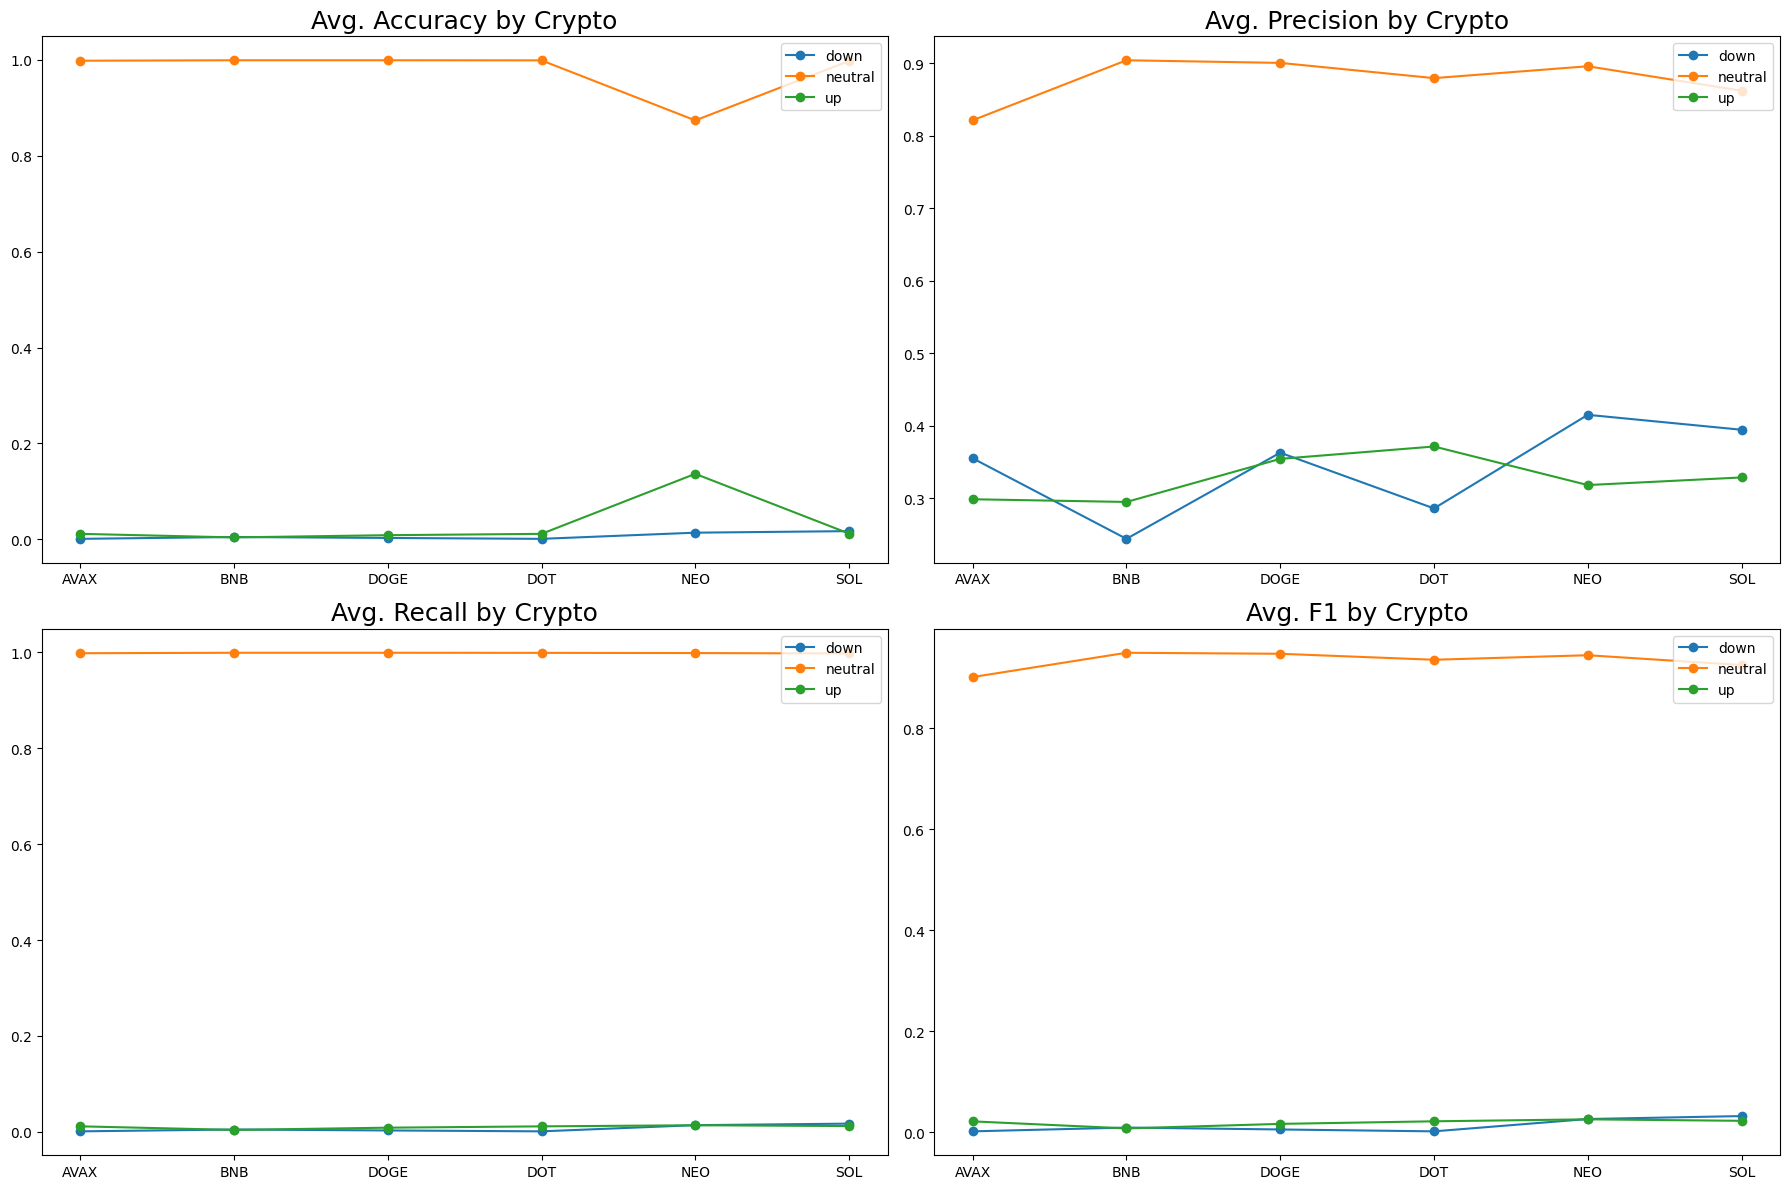

In [6]:
grouped = results_default.drop(columns=['view', 'view_id'])
grouped = grouped.groupby(['crypto']).mean()
plot_metrics(grouped, x_title='Crypto')

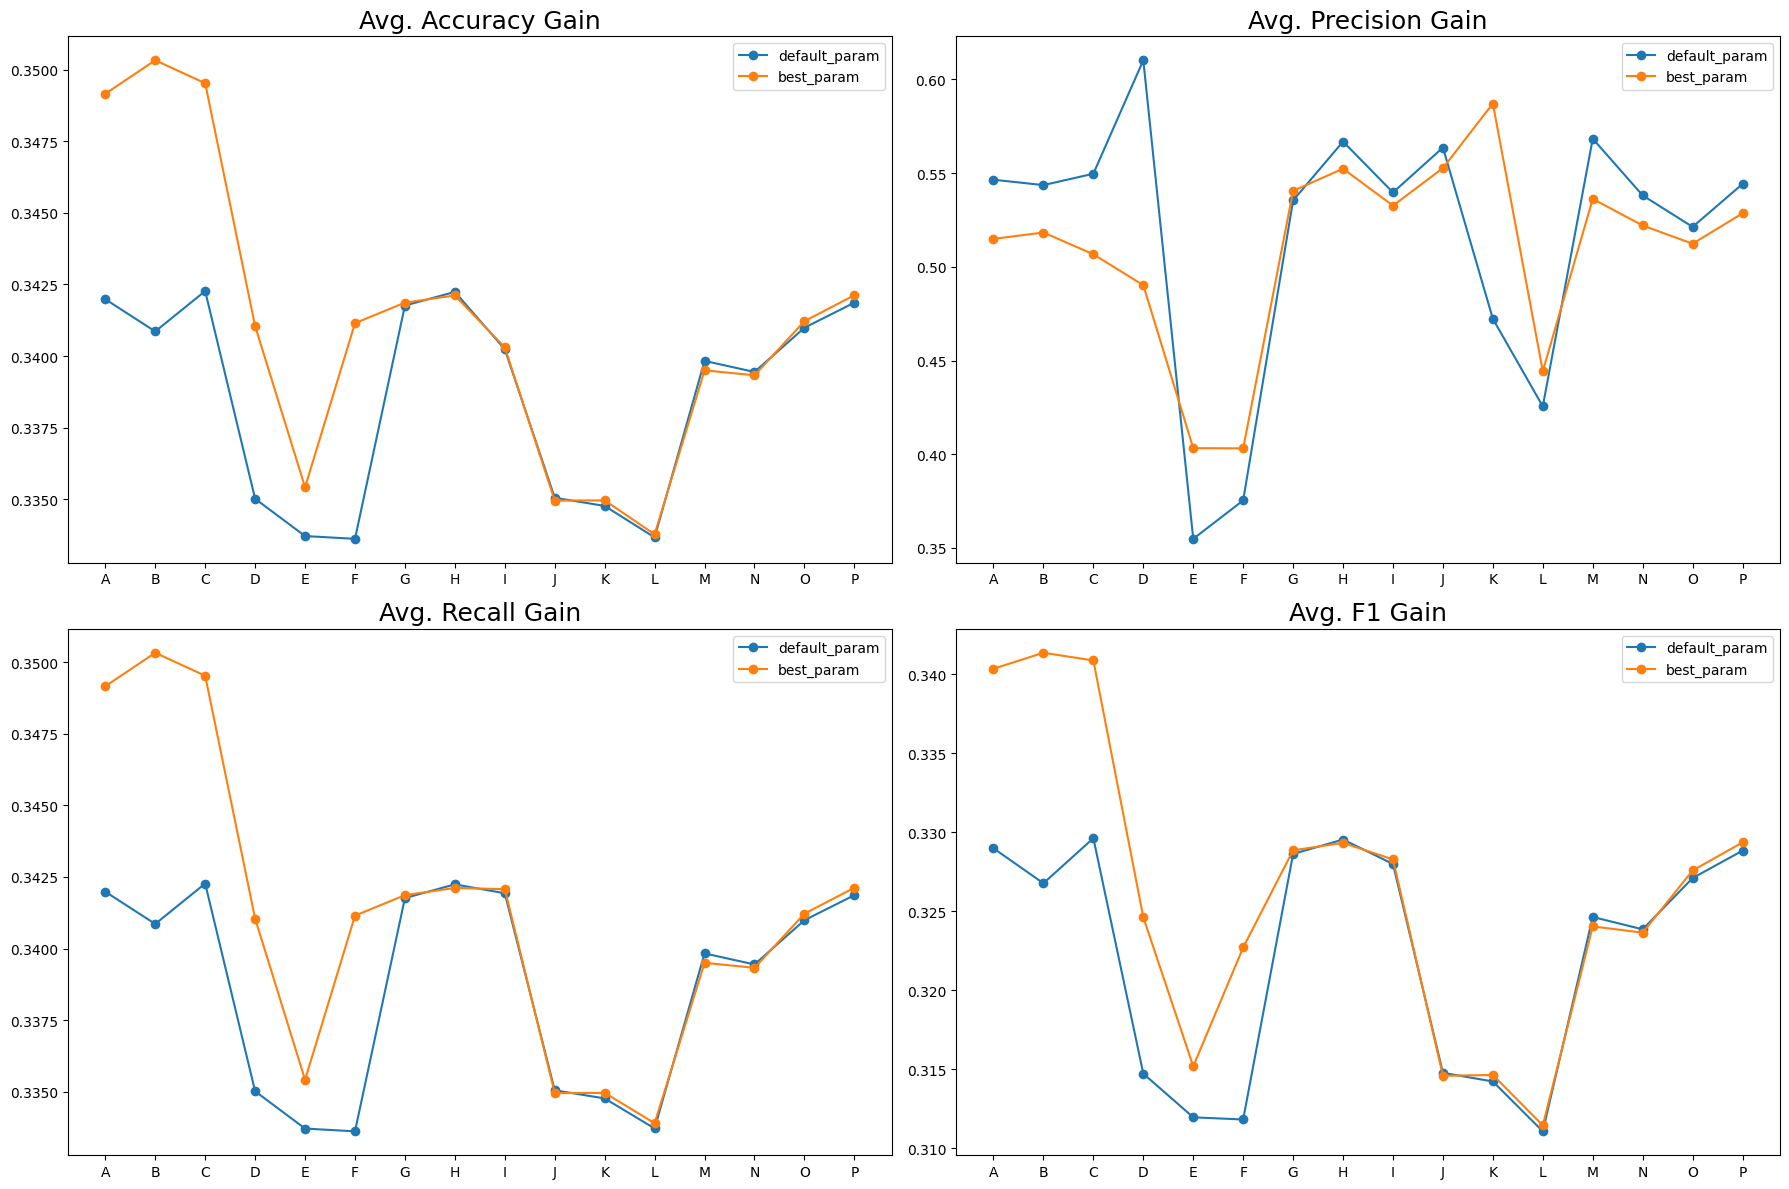

In [7]:
grouped1 = results_default.drop(columns=['view', 'crypto'])
grouped1 = grouped1.groupby(['view_id']).mean()
grouped2 = results_tuning.drop(columns=['view'])
grouped2 = grouped2.groupby(['view_id', 'crypto']).max()
grouped2 = grouped2.groupby(['view_id']).mean()
plot_gain(grouped1, grouped2)

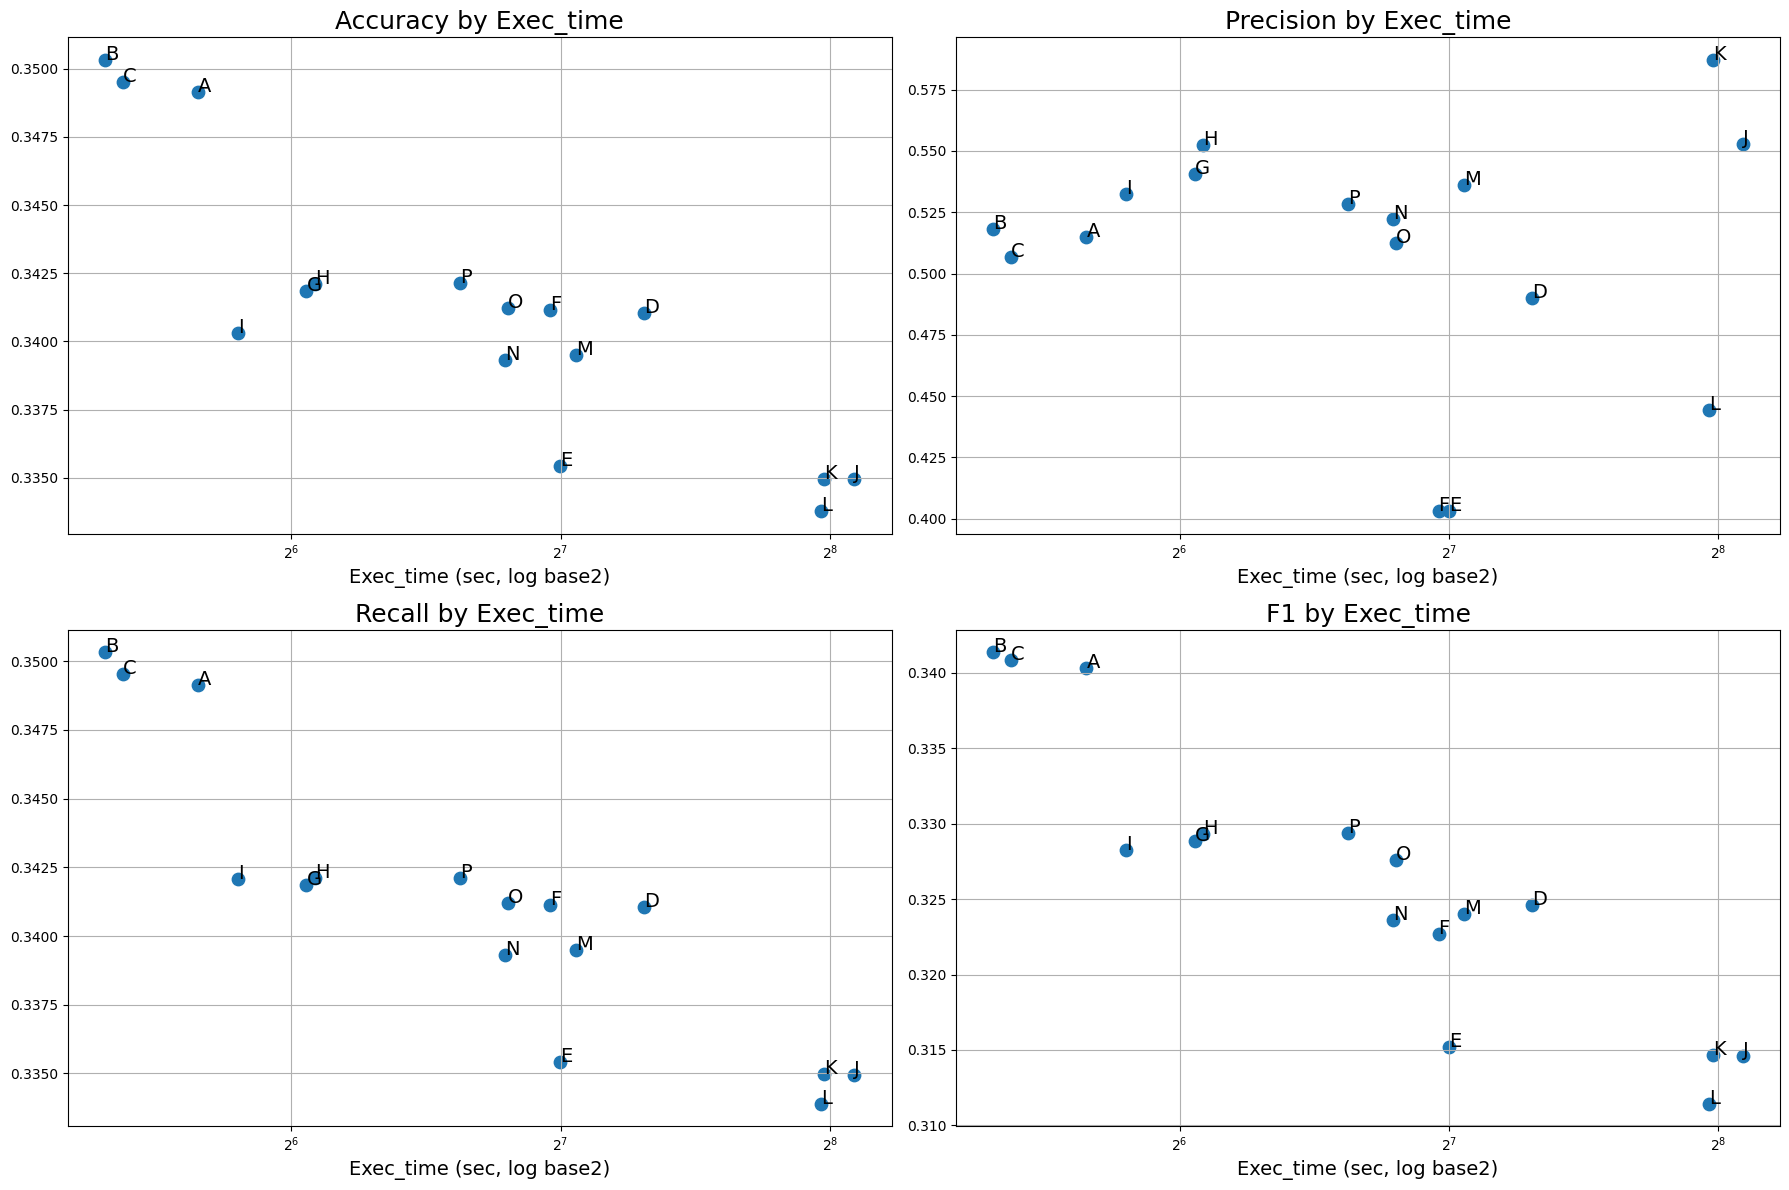

In [8]:
grouped1 = results_tuning.drop(columns=['view', 'crypto'])
grouped2 = results_tuning.drop(columns=['view'])
grouped2 = grouped2.groupby(['view_id', 'crypto']).max()
grouped2 = grouped2.groupby(['view_id']).mean()
grouped2['exec_time'] = grouped1.groupby(['view_id']).mean()['exec_time']
plot_tradeoff(grouped2)

In [11]:
# granularity accepts 'view' or 'crypto'
print_best_params(results_default, results_tuning, granularity='view')

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 

                                         BEST PARAMS

ID      CRYPTO         learning_rate          max_iter    max_leaf_nodes

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > 
A       avg.                     0.5                50                10
B       avg.                     0.5                50               100
C       avg.                     0.5                50               100
D       avg.                     0.5                50               100
E       avg.                     0.5                50               100
F       avg.                     0.5                50               100
G       avg.                     0.5                50               100
H       avg.                     0.5                50                10
I       avg.                     0.5                50                10
J       avg.                     0.5        